"INVESTIGACIÓN ESTADÍSTICA SOBRE LOS EFECTOS DE LA SALUD MENTAL EN EL RENDIMIENTO ACADÉMICO DE LOS ESTUDIANTES

Este conjunto de datos fue recopilado a través de una encuesta realizada mediante Google Forms, dirigida a estudiantes universitarios. El objetivo de esta investigación es examinar la situación académica actual de los estudiantes y su estado de salud mental. A través de este conjunto de datos, buscamos comprender mejor la relación entre la salud mental y el rendimiento académico, proporcionando información valiosa para abordar las preocupaciones y desafíos que los estudiantes pueden enfrentar en su trayectoria educativa."

1. IMPORTAMOS LAS DEPENDENCIAS NECESARIAS PARA EL PROYECTO.

In [1]:
#Importanto todas las dependencias necesarias para el proyecto.
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import datetime
import random
import os

2. LECTURA Y PRE-PROCESAMIENTO DE LOS DATOS.

In [2]:
df = pd.read_csv('StudentMentalhealth.csv')

In [3]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
#Tamaño de nuestro dataset.
df.shape

(101, 11)

In [5]:
#Tipos de datos en nuestro datasset.
df.dtypes

Timestamp                                        object
Choose your gender                               object
Age                                             float64
What is your course?                             object
Your current year of Study                       object
What is your CGPA?                               object
Marital status                                   object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object

In [6]:
#los valores únicos posibles para cada columna.
df.nunique()

Timestamp                                       92
Choose your gender                               2
Age                                              7
What is your course?                            49
Your current year of Study                       7
What is your CGPA?                               6
Marital status                                   2
Do you have Depression?                          2
Do you have Anxiety?                             2
Do you have Panic attack?                        2
Did you seek any specialist for a treatment?     2
dtype: int64

In [7]:
#Verificamos la existencia de datos nulos en nuestro dataset.
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [8]:
#Queremos eliminar ese dato nulo.
#Sin embargo, al tratarse de un ambiente universitario, podríamos también
#-NO CON EL 100% DE CERTEZA- deducir su edad con el promedio de los participantes.
df_copy = df.copy()
df_copy = df_copy.dropna(how="any", axis=0)

In [9]:
#Verificamos...
df_copy.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [10]:
#Econtramos que hay un error de escritura que hace que valores como Year 1 y year 1, sean "diferentes". 
print(df_copy["Your current year of Study"].unique())
df_copy["Your current year of Study"] = df_copy["Your current year of Study"].replace({"Year 1": "year 1", "Year 2": "year 2", "Year 3": "year 3"})
print(df_copy["Your current year of Study"].unique())

['year 1' 'year 2' 'Year 1' 'year 3' 'year 4' 'Year 2' 'Year 3']
['year 1' 'year 2' 'year 3' 'year 4']


In [11]:
print(df_copy["What is your CGPA?"].unique())
#En éste caso, existe también un error causado en la toma de los datos por un espacio adicional en uno de los rangos.
df_copy["What is your CGPA?"] = df_copy["What is your CGPA?"].replace({"3.50 - 4.00 ": "3.50 - 4.00"})
print(df_copy["What is your CGPA?"].unique())

['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']
['3.00 - 3.49' '3.50 - 4.00' '2.50 - 2.99' '2.00 - 2.49' '0 - 1.99']


3. VISUALIZACIÓN DE LOS DATOS.

Text(0.5, 1.0, 'Distribución de las edades.')

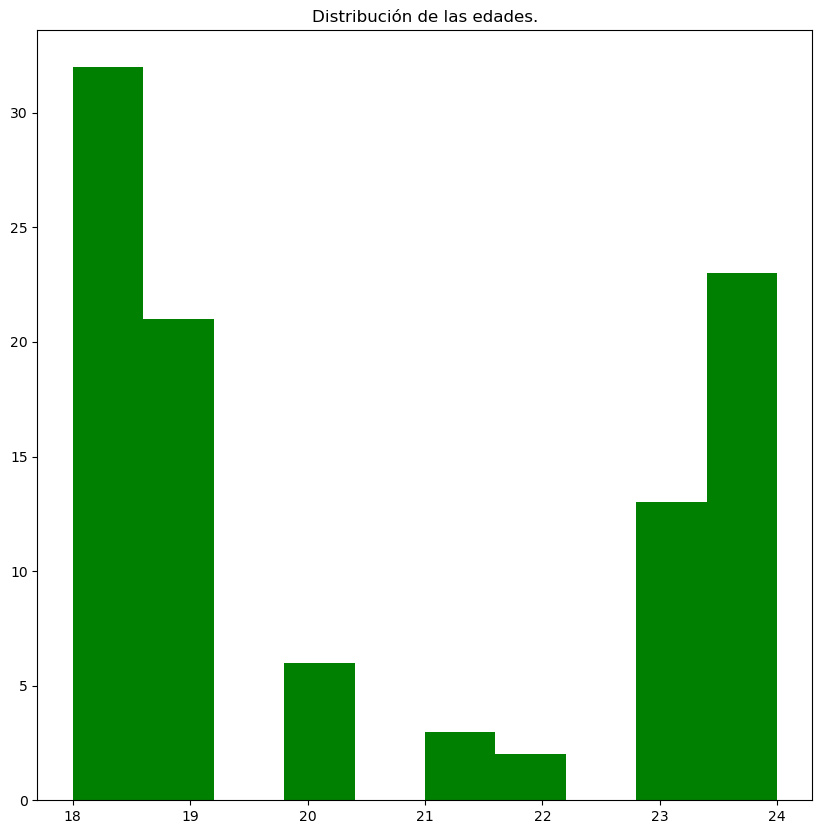

In [12]:
plt.figure(figsize=(10,10))
plt.hist(df_copy["Age"], color = "g")
plt.title("Distribución de las edades.")

Encontramos un rango de edades de entre 18 y 24 años.
Edades bastante comunes en ambientes universitarios. 

In [13]:
#Cambiar el nombre de las columnas nos puede facilitar el trabajo.
df_copy.rename(columns = {'Choose your gender': 'gender'}, inplace = True)

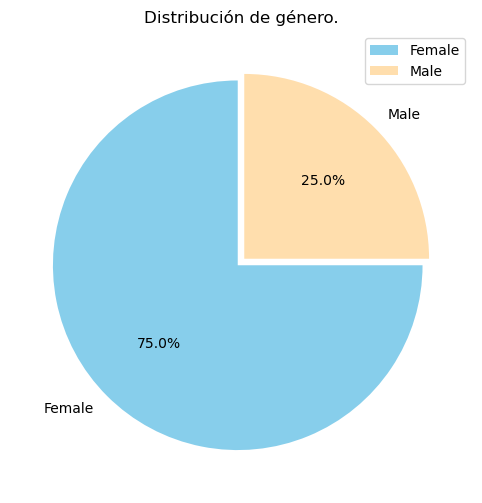

In [14]:
#Graficamos una torta para visualizar la distribución del género dentro de nuestro dataset.
plt.figure(figsize=(12,6))
plt.title("Distribución de género.")
g = plt.pie (df_copy.gender.value_counts(), explode = (0.025, 0.025), labels = df_copy.gender.value_counts().index, colors = ["skyblue", "navajowhite"],autopct="%1.1f%%", startangle=90);
plt.legend()
plt.show()

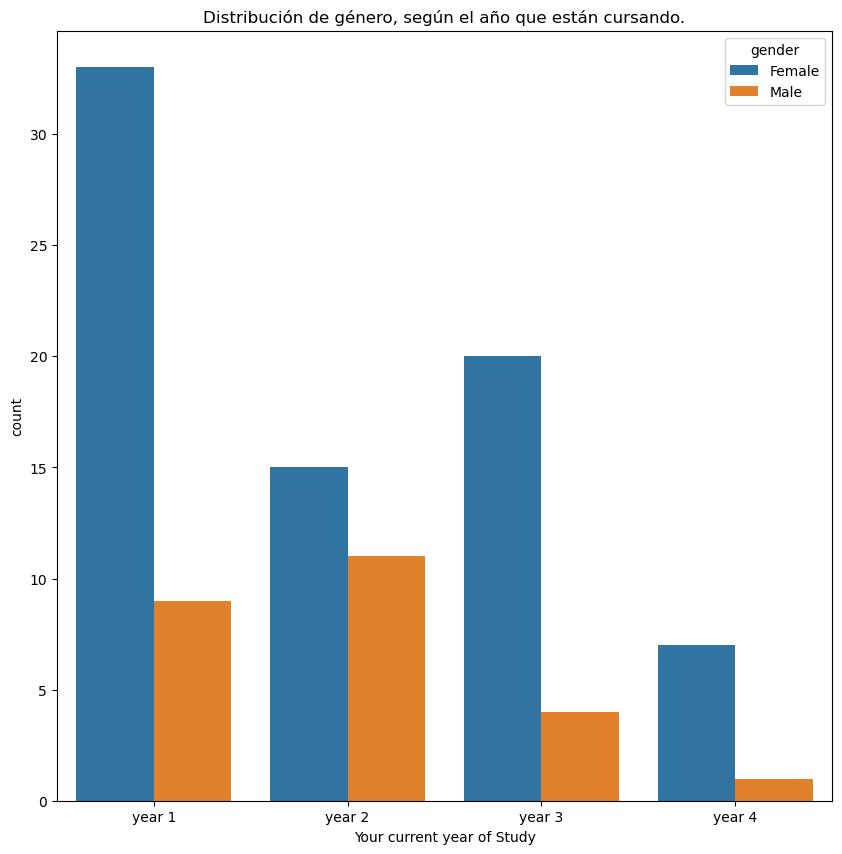

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(x = 'Your current year of Study', hue= "gender", data=df_copy)
plt.title("Distribución de género, según el año que están cursando.");

Podemos ver un decrecimiento de estudiantes de ambos géneros en función del pasar del tiempo.
Los motivos pueden ser múltiples.

Text(0.5, 1.0, 'Conteo de quiénes tienen o no ansiedad y/o depresión.')

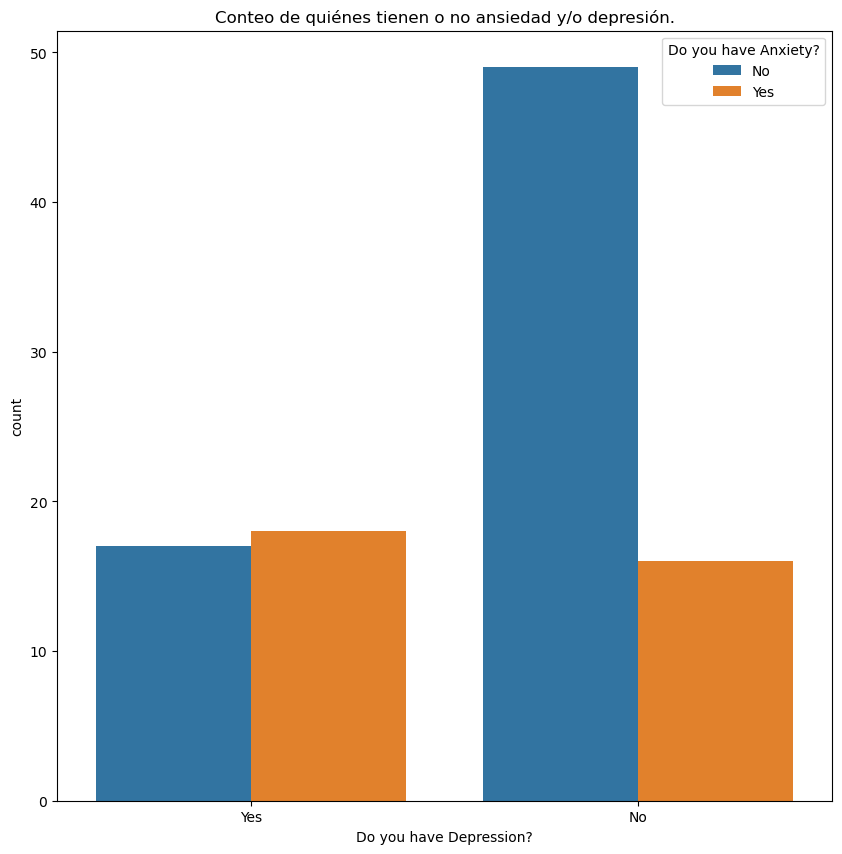

In [16]:
#Queremos observar quiénes tienen o no, ansiedad y/o depresión. 
plt.figure(figsize=(10,10))
sns.countplot(x="Do you have Depression?", hue="Do you have Anxiety?", data=df_copy)
plt.title("Conteo de quiénes tienen o no ansiedad y/o depresión.")

Text(0.5, 1.0, 'Presencia/ausencia de ansiedad segun el género.')

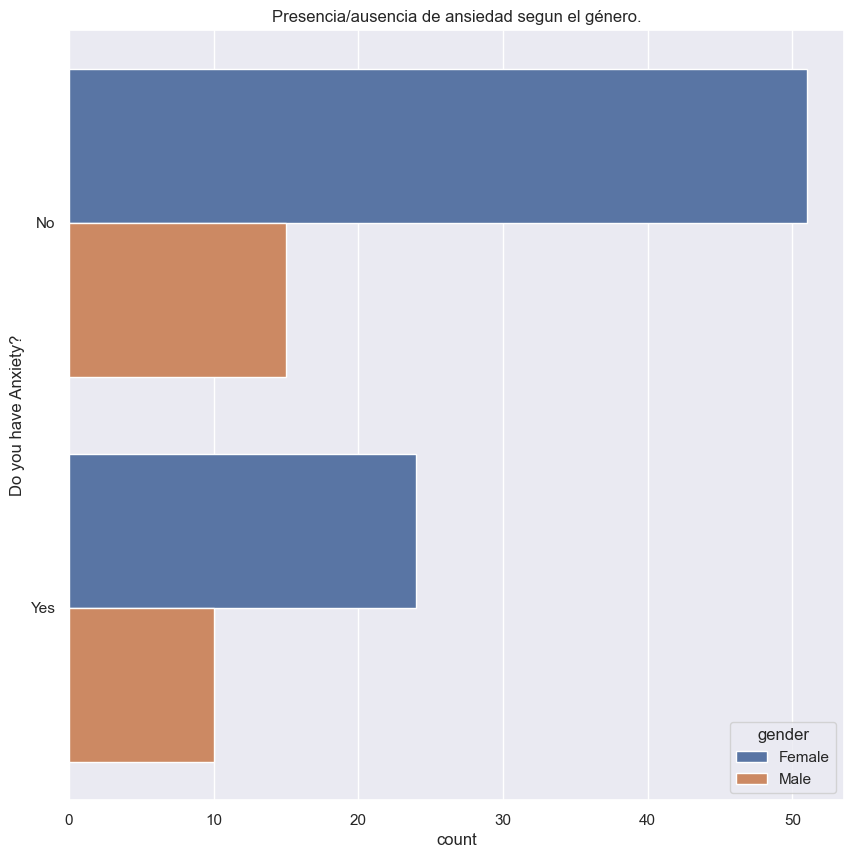

In [17]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Do you have Anxiety?", hue= "gender", data= df_copy)
plt.title("Presencia/ausencia de ansiedad segun el género.")

Text(0.5, 1.0, 'Presencia/ausencia de Depresión segun el género.')

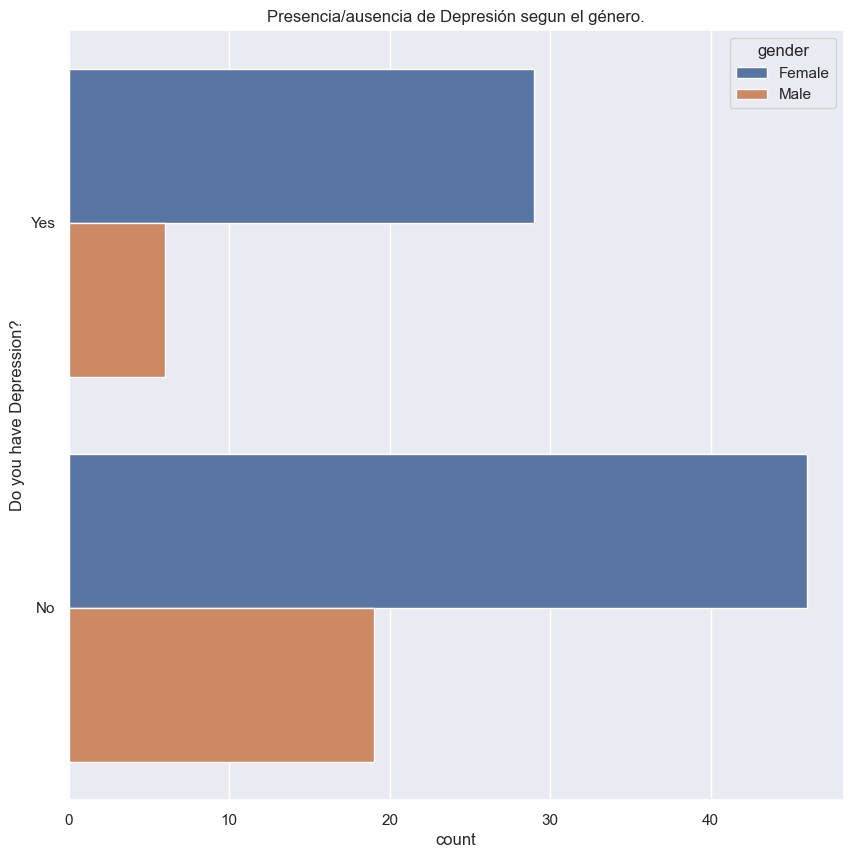

In [18]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y="Do you have Depression?", hue= "gender", data= df_copy)
plt.title("Presencia/ausencia de Depresión segun el género.")

Encontramos niveles de ansiedad y depresión altos en las mujeres. 
También niveles altos en ansiedad en hombres, considerando que en el dataset hay mayor densidad de mujeres.

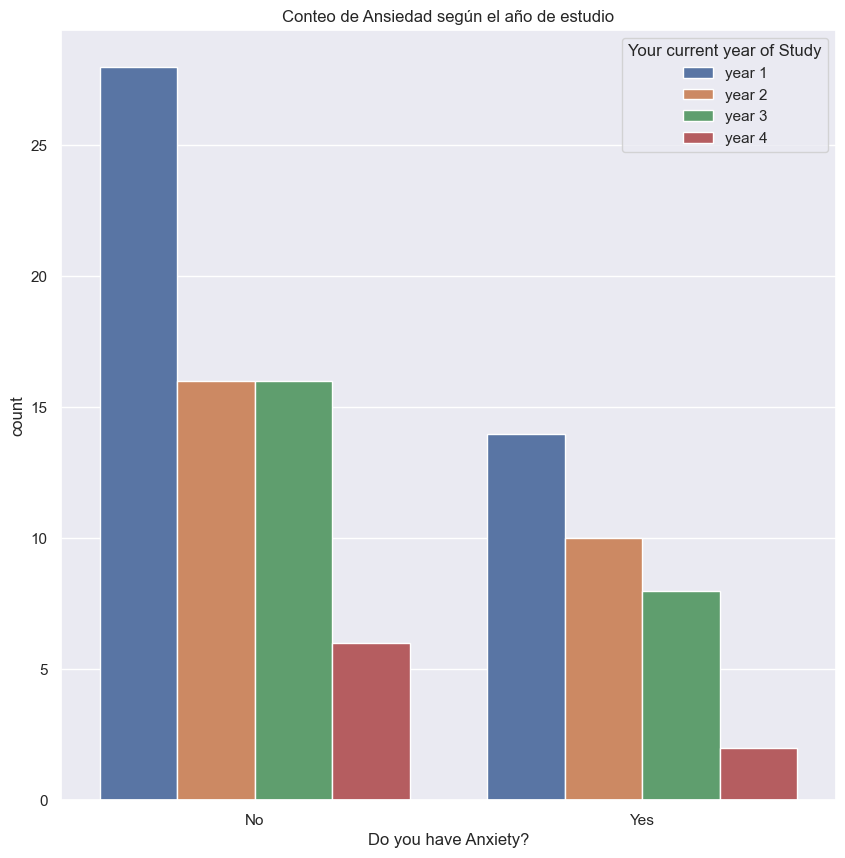

In [19]:
plt.figure(figsize= (10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x= "Do you have Anxiety?", hue= "Your current year of Study", data= df_copy)
plt.title("Conteo de Ansiedad según el año de estudio")
plt.show()

Podemos observar un decrecimiento en los niveles de ansiedad conforme aumenta el año que está cursando cada persona.
Aún así, es importante destacar que también hay menos estudiantes en función del aumento del año de estudio, según el dataset.

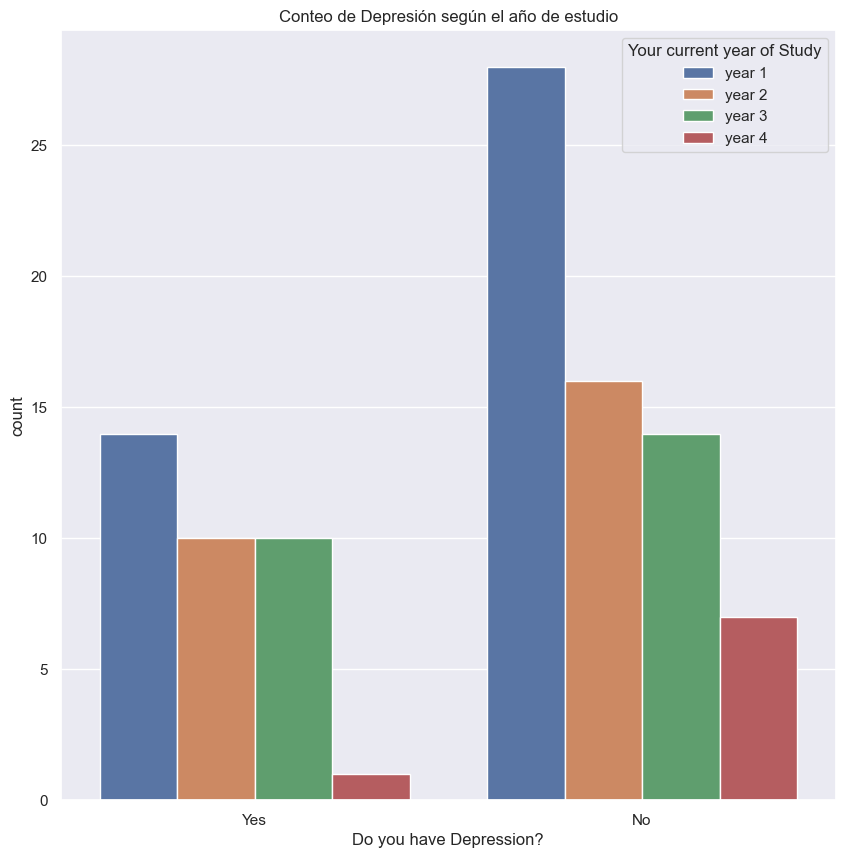

In [20]:
plt.figure(figsize= (10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x= "Do you have Depression?", hue= "Your current year of Study", data= df_copy)
plt.title("Conteo de Depresión según el año de estudio")
plt.show()

Podemos observar un decrecimiento en los niveles de depresión, igualmente, conforme aumenta el año que está cursando cada persona.

Esto podría deberse a la capacidad de lidiar con nuevos retos. 
Ser nuevo en algo representa un nivel de complegidad superior pues, el individuo se encuentra en el inicio de la curva de aprendizaje.

Aunque existe esta tendencia observada, también hay otros factores que podrían influir en los niveles de depresión, como factores personales, sociales o de salud mental.

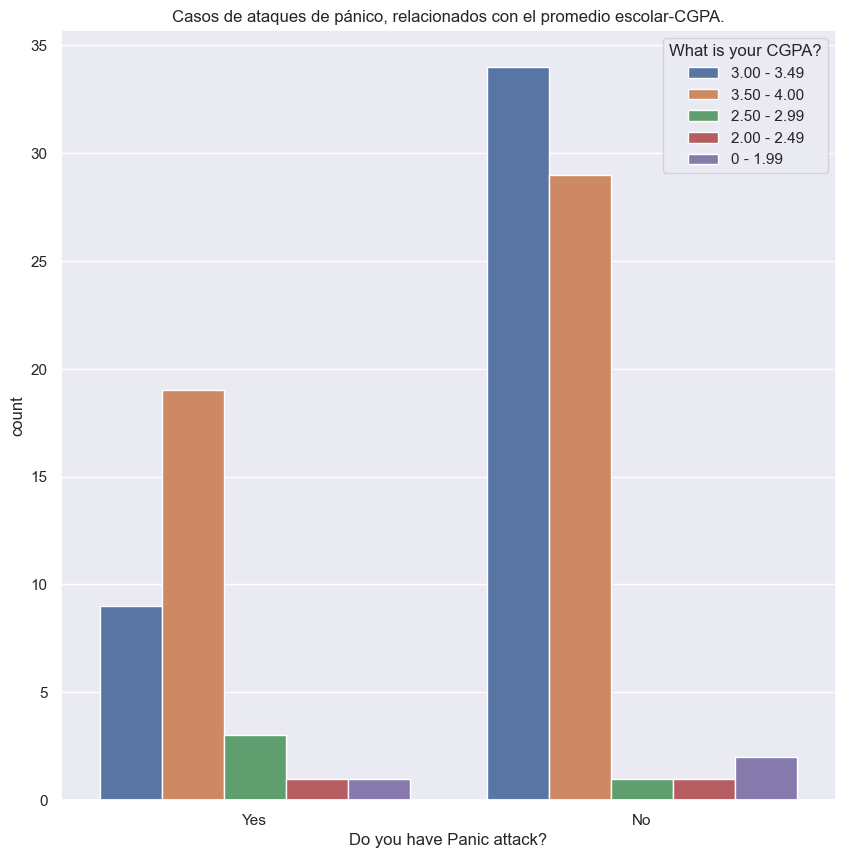

In [22]:
plt.figure(figsize=(10,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Do you have Panic attack?", hue="What is your CGPA?", data=df_copy)
plt.title("Casos de ataques de pánico, relacionados con el promedio escolar-CGPA.")
plt.show()